<a href="https://colab.research.google.com/github/mm230/AMMI-20Cross-Validation_Students-Version/blob/main/Copie_de_AMMI_2022_Cross_Validation_Students_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dataset Class:

It is always recommended to create a seperate class to prepare the data. Usually we use the Dataset class for:


1.   Downloading the data, if needed.
2.   Preprocessing the data.
3.   Spliting the data.




In [7]:
class Dataset:
  def __init__(self, path, test_size=0.2):
    self.test_size = test_size
    if path==None:
        self.train_inputs = []
        self.test_inputs = []
        self.train_targets = []
        self.test_targets = []
    else:
        self.initialize(path)
    
  def initialize(self, path):
    data = pd.read_csv(path,  encoding='latin-1')
    #Fill all the NAN values with the mean
    for col in data.columns:
      if data[col].isna().sum()!=0:
        data[col][data[col].isna()] = data[col].mean()
        
    data = data.drop(['Geography', 'binnedInc'], axis=1)
    
    target = data["TARGET_deathRate"].values
    inputs = data.drop("TARGET_deathRate", axis=1)

    inputs = inputs.values
    #Use here the kind of preprocessing you like
    inputs = inputs/inputs.max(axis=0)

    
    self.target = target
    self.inputs = inputs
    
    #Shuffle before splitting the data
    indices = np.arange(len(self.target))
    np.random.shuffle(indices)
    test_num_points = int(self.test_size * len(indices))
    test_indices = indices[:test_num_points]
    train_indices = indices[test_num_points:]

    self.train_inputs = self.inputs[train_indices]
    self.test_inputs = self.inputs[test_indices]
    self.train_targets = self.target[train_indices]
    self.test_targets = self.target[test_indices]
  


    

In [9]:
dataset = Dataset("/content/drive/MyDrive/cancer_reg.csv", test_size=0.2) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
print("train inputs shape: ",dataset.train_inputs.shape)
print("test inputs shape: ",dataset.test_inputs.shape)

train inputs shape:  (2438, 31)
test inputs shape:  (609, 31)


# Linear Regression With Regularization:

In [11]:
class LinearRegressionModel:
  def __init__(self, dataset, lr = 0.001, epochs=10000):
    self.dataset = dataset
    self.learning_rate = lr
    self.epochs = epochs
    #initialize the parameters randomly
    self.theta = np.random.randn(dataset.train_inputs.shape[1]+1)

  def add_one(self, x):
    X_new = np.hastsk([np.ones((np.shape[0], 1)), X)
    pass
 

  def predict(self, x):
    x = add_ones(x.values)
  y_Pred = x @ theta
    pass

  def compute_mse_loss(self, y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true - y_Pred)**2)/n
    return mse

  def plot_loss_and_params(self, train_losses, test_losses):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
    ax1.plot(train_losses[10:], label="train-loss")
    ax1.plot(test_losses[10:], label="test-loss")
    ax1.set_title('loss')
    ax2.stem(self.theta, use_line_collection=True)
    ax2.set_title('params values')
    ax3.hist(self.theta, 50, facecolor='g', alpha=0.75)
    ax3.set_title('params histogram')

    plt.show()


  def train(self, batch_size=32, plot=True):
    train_losses = []
    test_losses = []

    for epoch in range(self.epochs):
      pass
  
    if plot:
      self.plot_loss_and_params(train_losses, test_losses)






In [12]:
model = LinearRegressionModel(dataset, lr = 0.0001, epochs=10000)

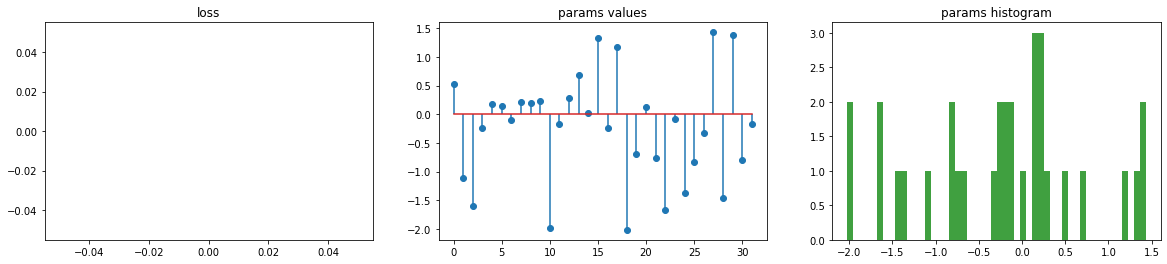

In [13]:
model.train(batch_size=128, plot=True)

# Cross Validation:

1. Pick a number of folds – k. Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.
2. Split the dataset into k equal (if possible) parts (they are called folds)
3. Choose k – 1 folds as the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score average the results that you got on step 6.

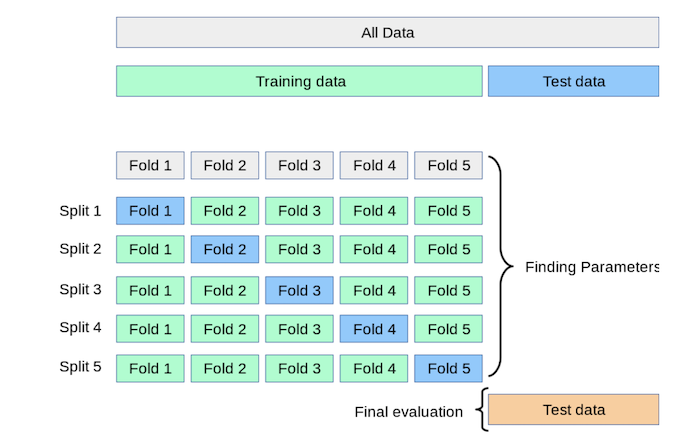

Cross validation is used to find the best hyperparameters during training. We use it to validate each hyperpameters set we choose.

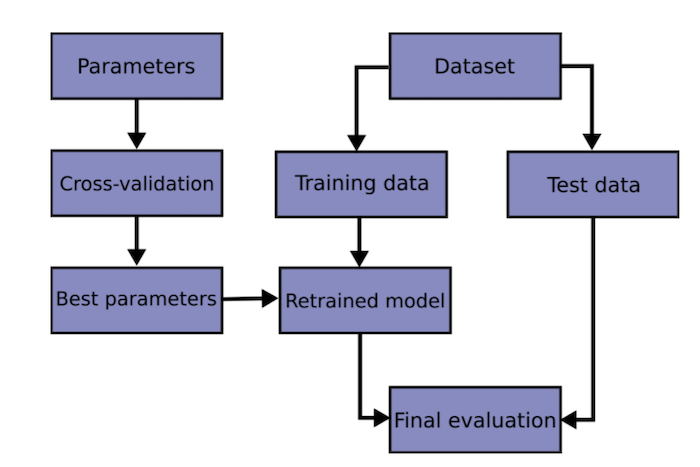

[Figures Source](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:


class kFoldsCV:
  '''
   Provides train/val indices to split data in train/val sets


  '''
  def __init__(self, n_folds: int=10):
    self.n_folds = n_folds
    pass
  def __call__(self, `add your parameters here`):
    pass






In [ ]:
cv = kFoldsCV(n_folds=5)

In [ ]:
cv(dataset, plot=False)

Starting cross validation with 5 folds, fold size = 16, dataset size = 80
Fold 0 ✅✅✅✅✅✅✅✅✅
Epoch: 0 train - loss: 2479.2319 test-loss: 770.7122
Epoch: 1000 train - loss: 365.6959 test-loss: 372.9048
Epoch: 2000 train - loss: 357.5439 test-loss: 375.2095
Epoch: 3000 train - loss: 380.6846 test-loss: 376.1498
Epoch: 4000 train - loss: 372.2866 test-loss: 381.6468
Finishing from fold 0, loss = 363.5548949252768 ✅✅✅✅✅✅✅✅✅
Fold 1 ✅✅✅✅✅✅✅✅✅
Epoch: 0 train - loss: 2415.3963 test-loss: 757.8570
Epoch: 1000 train - loss: 368.4891 test-loss: 373.5964
Epoch: 2000 train - loss: 464.3325 test-loss: 378.0900
Epoch: 3000 train - loss: 420.1369 test-loss: 387.0756
Epoch: 4000 train - loss: 373.9489 test-loss: 382.0460
Finishing from fold 1, loss = 464.22227295939445 ✅✅✅✅✅✅✅✅✅
Fold 2 ✅✅✅✅✅✅✅✅✅
Epoch: 0 train - loss: 2364.8809 test-loss: 763.8686
Epoch: 1000 train - loss: 361.7199 test-loss: 373.4676
Epoch: 2000 train - loss: 378.2633 test-loss: 375.0253
Epoch: 3000 train - loss: 365.3107 test-loss: 386

#Early Stopping:

One simple way to prevent overfitting is to just stop the training once we feel that the model is starting to overfit.


---


Modfiy the *Train(...)* function in your LinearRegression class to accept additional parameter; EarlyStopping object.

After each epoch, the *Train(...)* function must call the *stop_early(...)* function using the EarlyStopping object. If the *stop_early(...)* function returns **True**, we will stop the training. If it return **False**, we will continue training the model.


---


*Feel free to modify the parameters that the __init__(...) and stop_early(...)* functions take. 
Also feel free to add new functions to the class.*

In [ ]:
class EarlyStopping:
  '''
  If the loss doesn't decrease for {patient} epoch, we terminate the training.
  We don't consider any change in the loss that is less than {epsilon}

  
  
  '''
  def __init__(self, patient: int, epsilon: float):
    pass

  def stop_early(self, epoch_loss: float) -> bool:
    '''
    This function tracks all the previous {patient} losses and decides for us whether to stop the training or not.

    '''
    pass